# Exploratory Data Analysis of the .mat Adult EEG Dataset

## 1.Libraries

In [ ]:
import numpy as np
import pandas as pd
from LoggerHelper import LoggerHelper
from pathlib import Path

In [15]:
FOLDER_PATH = Path("MENDELEY_ADHD_EEG")
sample_file = next(FOLDER_PATH.glob("*.mat")) # we get the first .mat file in the folder


LoggerHelper.info(f"The sample file is:{sample_file.name}")
print("-"*60)

mat_data = LoggerHelper.load_mat_file(sample_file)

keys =[key for key in mat_data.keys() if not key.startswith("__")]

LoggerHelper.info(f"Keys in the .mat file: {keys}")
main_key = keys[0] 
LoggerHelper.info(f"Main key in the .mat file: {main_key}")

eeg_data = mat_data[main_key]
eyes_open = mat_data[main_key][0,0]
LoggerHelper.info(f"EEG data shape: {eeg_data.shape}")
LoggerHelper.info(f"Labels shape: {eyes_open.flatten().shape}")
LoggerHelper.info(f"Labels shape: {eyes_open.shape}")

eyes_closed = mat_data[main_key][0,1]
LoggerHelper.info(f"EEG data shape: {eeg_data.shape}")
LoggerHelper.info(f"Labels shape: {eyes_closed.flatten().shape}")
LoggerHelper.info(f"Labels shape: {eyes_closed.shape}")


2025-12-10 22:21:48 - INFO - [INFO] The sample file is:FADHD.mat
2025-12-10 22:21:48 - INFO - [INFO] Keys in the .mat file: ['FADHD']
2025-12-10 22:21:48 - INFO - [INFO] Main key in the .mat file: FADHD
2025-12-10 22:21:48 - INFO - [INFO] EEG data shape: (1, 11)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (168960,)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (11, 7680, 2)
2025-12-10 22:21:48 - INFO - [INFO] EEG data shape: (1, 11)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (112640,)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (11, 5120, 2)


------------------------------------------------------------


2025-12-10 22:33:31 - INFO - [INFO] Starting preprocessing pipeline...


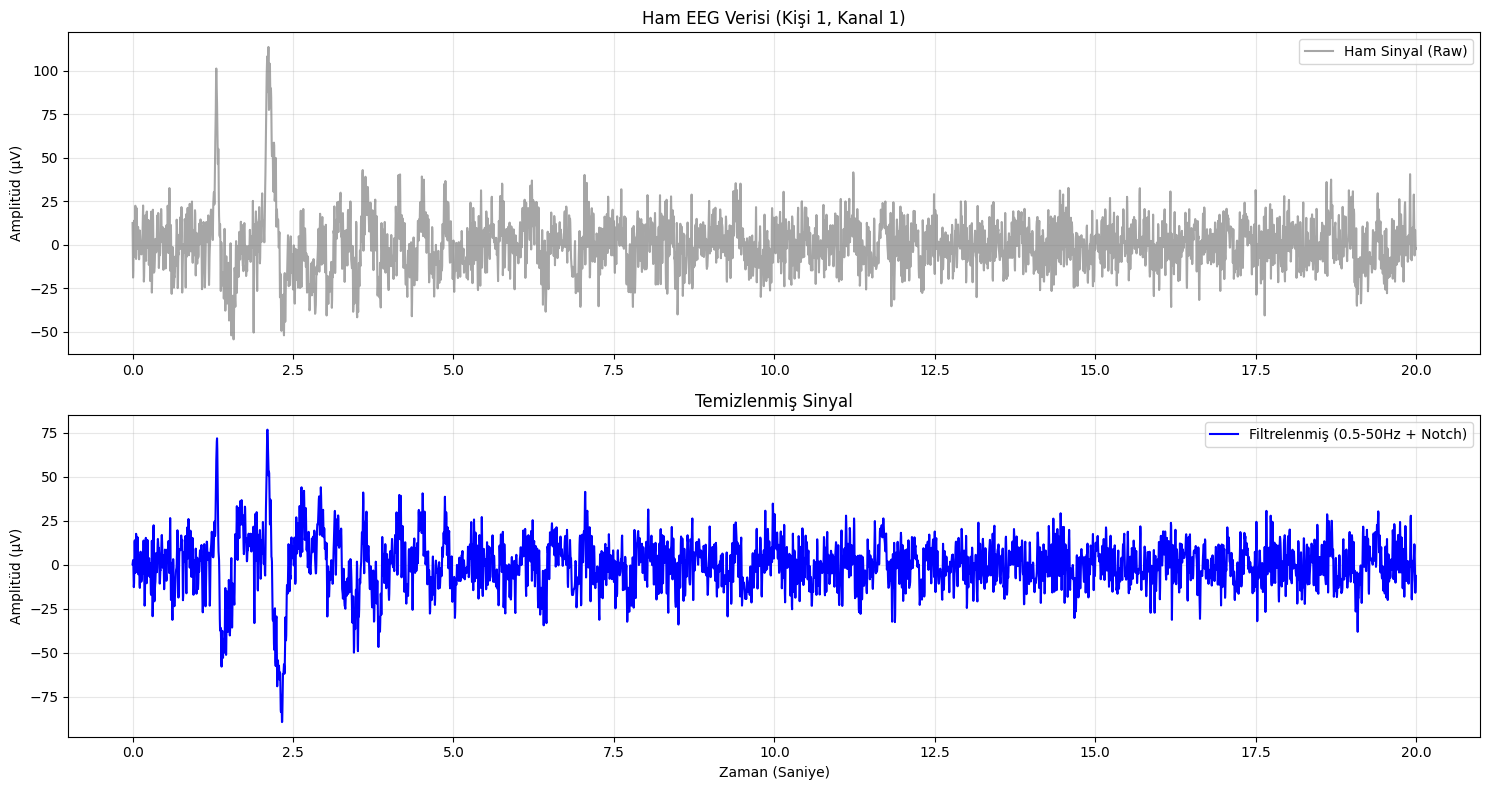

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# PreprocessorHelper dosyanın aynı klasörde olduğundan emin ol
from PreprocessorHelper import PreprocessorHelper 

# --- 1. VERİYİ SEÇME ---
# eyes_closed şekli: (11, 5120, 2) -> (Kişi, Zaman, Kanal)
# Biz 1. Kişinin (Index 0), 1. Kanalını (Index 0) alalım.
subject_idx = 0 
channel_idx = 0 

# : işareti "tüm zamanları al" demek
raw_signal = eyes_closed[subject_idx, :, channel_idx] # Şekli: (5120,) olacak

# --- 2. FİLTRELEME (Test Amaçlı) ---
# fs=256 olduğunu biliyoruz.
preprocessor = PreprocessorHelper(fs=256, lowcut=0.5, highcut=50.0)
clean_signal = preprocessor.preprocess(raw_signal)

# --- 3. ZAMAN EKSENİ OLUŞTURMA ---
# X ekseninde 0, 1, 2... 5120 diye sayı görmek yerine "Saniye" görelim.
time_axis = np.arange(len(raw_signal)) / 256.0

# --- 4. GÖRSELLEŞTİRME ---
plt.figure(figsize=(15, 8))

# Üst Grafik: Ham Veri
plt.subplot(2, 1, 1) # 2 satır, 1 sütun, 1. grafik
plt.plot(time_axis, raw_signal, label='Ham Sinyal (Raw)', color='gray', alpha=0.7)
plt.title(f"Ham EEG Verisi (Kişi {subject_idx+1}, Kanal {channel_idx+1})")
plt.ylabel("Amplitüd (µV)")
plt.legend()
plt.grid(True, alpha=0.3)

# Alt Grafik: Filtrelenmiş Veri
plt.subplot(2, 1, 2) # 2 satır, 1 sütun, 2. grafik
plt.plot(time_axis, clean_signal, label='Filtrelenmiş (0.5-50Hz + Notch)', color='blue')
plt.title("Temizlenmiş Sinyal")
plt.xlabel("Zaman (Saniye)")
plt.ylabel("Amplitüd (µV)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
FOLDER_PATH = Path("MENDELEY_ADHD_EEG")
sample_file = next(FOLDER_PATH.glob("*.mat")) # we get the first .mat file in the folder


LoggerHelper.info(f"The sample file is:{sample_file.name}")
print("-"*60)

mat_data = LoggerHelper.load_mat_file(sample_file)

keys =[key for key in mat_data.keys() if not key.startswith("__")]

LoggerHelper.info(f"Keys in the .mat file: {keys}")
main_key = keys[0] 
LoggerHelper.info(f"Main key in the .mat file: {main_key}")

eeg_data = mat_data[main_key]
eyes_open = mat_data[main_key][0,0]
LoggerHelper.info(f"EEG data shape: {eeg_data.shape}")
LoggerHelper.info(f"Labels shape: {eyes_open.flatten().shape}")
LoggerHelper.info(f"Labels shape: {eyes_open.shape}")

eyes_closed = mat_data[main_key][0,1]
LoggerHelper.info(f"EEG data shape: {eeg_data.shape}")
LoggerHelper.info(f"Labels shape: {eyes_closed.flatten().shape}")
LoggerHelper.info(f"Labels shape: {eyes_closed.shape}")


2025-12-10 22:21:48 - INFO - [INFO] The sample file is:FADHD.mat
2025-12-10 22:21:48 - INFO - [INFO] Keys in the .mat file: ['FADHD']
2025-12-10 22:21:48 - INFO - [INFO] Main key in the .mat file: FADHD
2025-12-10 22:21:48 - INFO - [INFO] EEG data shape: (1, 11)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (168960,)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (11, 7680, 2)
2025-12-10 22:21:48 - INFO - [INFO] EEG data shape: (1, 11)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (112640,)
2025-12-10 22:21:48 - INFO - [INFO] Labels shape: (11, 5120, 2)


------------------------------------------------------------


## Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
